
✅ 총 리뷰 개수: 500

💬 SSG 앱 단점/불편 키워드 TOP 10
배송: 86
결제: 22
불편하다: 20
검색: 12
취소: 8
복잡하다: 7
느리다: 7
짜증나다: 6
어렵다: 4
배송비: 4

💬 '불편' 관련 샘플 문장 10개

💬 '불편'과 함께 언급된 상위 단어

💬 '결제'과 함께 언급된 상위 단어
카드: 6
재고: 5
바로: 4
처음: 3
상품권: 3
취소: 3
물건: 2
어플: 2
오류: 2
무료: 2

💬 '배송'과 함께 언급된 상위 단어
구매: 12
상품: 11
새벽: 10
주문: 10
제품: 7
쿠폰: 6
이마트: 6
물건: 6
품절: 6
재고: 6

💬 SWOT W용 문장 (상위 10개 키워드 기준)
- 배송 정보/추적 관련 문제로 사용자 불만 발생 (빈도: 86)
- 결제 과정에서 오류/지연으로 구매 이탈 발생 (빈도: 22)
- 불편하다 관련 문제 발생 (빈도: 20)
- 검색 기능이 부정확하거나 느려 불편 (빈도: 12)
- 주문 취소/환불 과정이 불편함 (빈도: 8)
- 복잡하다 관련 문제 발생 (빈도: 7)
- 느리다 관련 문제 발생 (빈도: 7)
- 짜증나다 관련 문제 발생 (빈도: 6)
- 어렵다 관련 문제 발생 (빈도: 4)
- 배송비 관련 문제 발생 (빈도: 4)


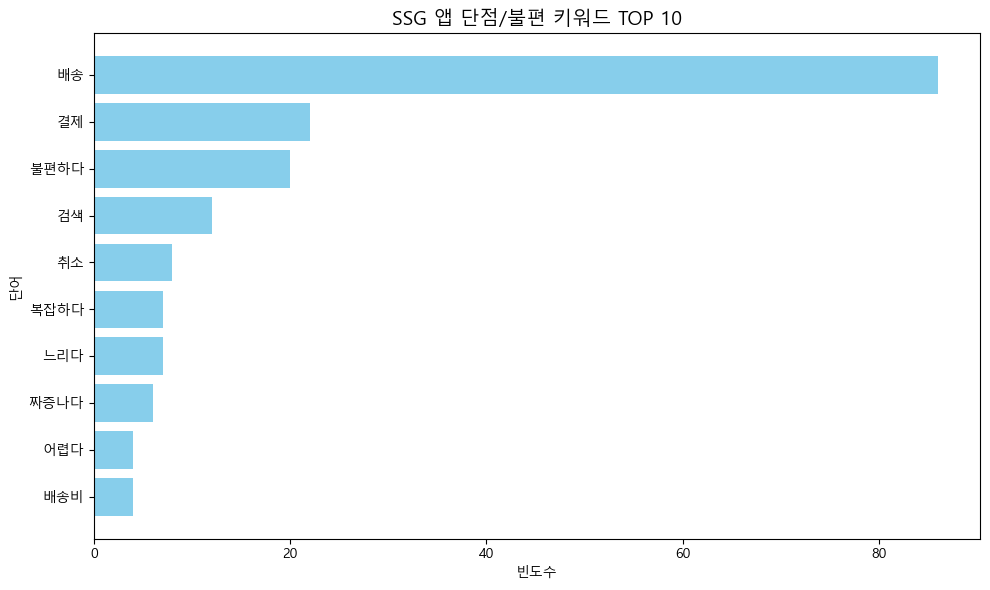

In [4]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 1️⃣ 엑셀 데이터 불러오기 (SSG 리뷰)
df = pd.read_excel(r'C:\Users\user\Desktop\마케팅\과제\팀프로젝트2\리뷰크롤링\ssg_reviews.xlsx')
comments = df['content'].dropna().astype(str)

# 총 리뷰 개수 확인
print(f"\n✅ 총 리뷰 개수: {len(comments)}")

# 2️⃣ 형태소 분석 준비
okt = Okt()

# 3️⃣ 불용어 정의
stopwords = [
    '좀', '진짜', '정말', '그냥', '너무', '거', '것', '이런', '저런',
    '에서', '하다', '있다', '없다', '되다', '입니다', '하게', '하면', '때문'
]

# 4️⃣ 앱 전반 부정 키워드 정의
negative_words = [
    '불편', '복잡', '느리', '어렵', '답답', '헷갈리', '지저분', '버그', '로딩', 
    '짜증', '튕기', '결제', '배송', '취소', '환불', '검색', '오류', '지연', '광고'
]

# 5️⃣ 형태소 분석 & 필터링
tokens = []
for comment in comments:
    tokens.extend(okt.pos(comment, stem=True))

filtered_words = [
    word for word, pos in tokens
    if pos in ['Noun', 'Adjective', 'Verb'] 
    and len(word) > 1
    and word not in stopwords
]

# 6️⃣ 부정 키워드 중심 필터링
negative_filtered = [w for w in filtered_words if any(k in w for k in negative_words)]

# 7️⃣ 상위 10개 부정 키워드
word_count = Counter(negative_filtered)
top_10 = word_count.most_common(10)

print("\n💬 SSG 앱 단점/불편 키워드 TOP 10")
for w, c in top_10:
    print(f"{w}: {c}")

# 8️⃣ 각 키워드 관련 문장 추출
keyword_sentences = {}
for kw, _ in top_10:
    keyword_sentences[kw] = [comment for comment in comments if kw in comment]

print("\n💬 '불편' 관련 샘플 문장 10개")
for s in keyword_sentences.get('불편', [])[:10]:
    print("-", s)

# 9️⃣ 연관 단어 분석
for kw in ['불편', '결제', '배송']:
    co_occurrence = defaultdict(int)
    for sentence in keyword_sentences.get(kw, []):
        words = [w for w in okt.nouns(sentence) if len(w) > 1 and w not in stopwords]
        for w in words:
            if w != kw:
                co_occurrence[w] += 1
    top_related = sorted(co_occurrence.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"\n💬 '{kw}'과 함께 언급된 상위 단어")
    for w, c in top_related:
        print(f"{w}: {c}")

# 10️⃣ SWOT W용 문장 예시
keyword_to_sentence = {
    '불편': '앱 탐색 및 기능 사용이 불편하여 신규 사용자가 적응하기 어려움',
    '복잡': '메뉴와 기능 구조가 복잡하여 사용자 경험 저하',
    '느리': '로딩 및 반응 속도가 느려 전환율 감소 가능',
    '어렵': '앱 기능 사용이 어려워 학습 부담 증가',
    '답답': '앱 반응 속도가 느려 사용자가 답답함을 느낌',
    '헷갈리': '화면 구성/버튼 배치가 헷갈려 혼란 발생',
    '지저분': '화면이 지저분하게 느껴져 시각적 불편',
    '버그': '결제 및 장바구니 등 기능에서 버그 발생',
    '로딩': '페이지 로딩 지연으로 사용자 경험 저하',
    '짜증': '앱 사용 중 잦은 오류로 사용자 불만 증가',
    '튕기': '앱이 자주 튕겨 재사용 불편',
    '결제': '결제 과정에서 오류/지연으로 구매 이탈 발생',
    '배송': '배송 정보/추적 관련 문제로 사용자 불만 발생',
    '취소': '주문 취소/환불 과정이 불편함',
    '환불': '환불 처리 속도가 느려 사용자 불만 증가',
    '검색': '검색 기능이 부정확하거나 느려 불편',
    '오류': '앱 전반에서 오류 발생으로 사용성 저하',
    '지연': '앱 로딩 및 기능 반응 지연으로 전환율 감소'
}

print("\n💬 SWOT W용 문장 (상위 10개 키워드 기준)")
for w, c in top_10:
    sentence = keyword_to_sentence.get(w, f"{w} 관련 문제 발생")
    print(f"- {sentence} (빈도: {c})")

# 11️⃣ 시각화
plt.figure(figsize=(10,6))
plt.barh(
    [w for w, _ in top_10[::-1]],
    [c for _, c in top_10[::-1]],
    color='skyblue'
)
plt.title("SSG 앱 단점/불편 키워드 TOP 10", fontsize=14)
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.tight_layout()
plt.show()



✅ 정제된 리뷰 개수: 407

💬 SSG 앱 UI/서비스 부정 키워드 TOP 10
배송: 86
결제: 22
불편하다: 20
검색: 12
취소: 8
복잡하다: 7
느리다: 7
짜증나다: 6
어렵다: 4
배송비: 4


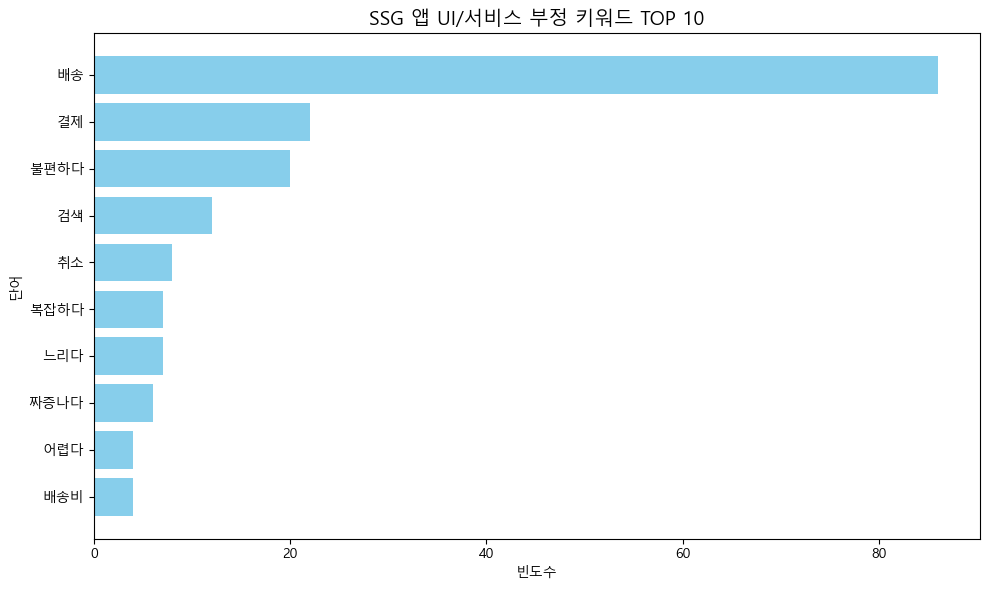

In [3]:
# ==============================================
# 1️⃣ 라이브러리 불러오기
# ==============================================
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ==============================================
# 2️⃣ 엑셀 데이터 불러오기 (SSG 리뷰)
# ==============================================
df = pd.read_excel(r'C:\Users\user\Desktop\마케팅\과제\팀프로젝트2\리뷰크롤링\ssg_reviews.xlsx')
df = df.dropna(subset=['content'])  # 결측치 제거
df = df[df['content'].str.len() >= 5]  # 짧은 문장 제거
comments = df['content'].astype(str)

print(f"\n✅ 정제된 리뷰 개수: {len(comments)}")

# ==============================================
# 3️⃣ 형태소 분석
# ==============================================
okt = Okt()
tokens = []
for comment in comments:
    tokens.extend(okt.pos(comment, stem=True))  # 원형 복원

# ==============================================
# 4️⃣ 불용어 & 부정 키워드 정의
# ==============================================
stopwords = [
    '좀', '진짜', '정말', '그냥', '너무', '거', '것', '이런', '저런',
    '에서', '하다', '있다', '없다', '되다', '입니다', '하게', '하면', '때문'
]

negative_words = [
    '불편', '복잡', '느리', '어렵', '답답', '헷갈리', '지저분', '버그', '로딩', 
    '짜증', '튕기', '결제', '배송', '취소', '환불', '검색', '오류', '지연', '광고'
]

# 명사/형용사/동사 & 길이>1 & 불용어 제거
filtered_words = [
    word for word, pos in tokens
    if pos in ['Noun', 'Adjective', 'Verb'] 
    and len(word) > 1
    and word not in stopwords
]

# 부정 키워드 중심 필터링
negative_filtered = [w for w in filtered_words if any(k in w for k in negative_words)]

# ==============================================
# 5️⃣ 키워드 빈도 계산 (Top 10)
# ==============================================
word_count = Counter(negative_filtered)
top_10 = word_count.most_common(10)

print("\n💬 SSG 앱 UI/서비스 부정 키워드 TOP 10")
for w, c in top_10:
    print(f"{w}: {c}")

# ==============================================
# 6️⃣ 시각화
# ==============================================
plt.figure(figsize=(10,6))
plt.barh(
    [w for w, _ in top_10[::-1]],
    [c for _, c in top_10[::-1]],
    color='skyblue'
)
plt.title("SSG 앱 UI/서비스 부정 키워드 TOP 10", fontsize=14)
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.tight_layout()
plt.show()
